<a href="https://colab.research.google.com/github/Deekshitmanisai/Deekshit-s-DataBase/blob/main/AP22110010779_FS_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import pandas as pd;
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('/content/melbourne_housing_raw (1).csv')
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for column in data.keys():
  if data[column].dtype == 'object':
    data[column] = label_encoder.fit_transform(data[column])

In [2]:


x=data.drop('Propertycount',axis=1)
y=data['Propertycount']
print(x.shape)
print(y.shape)
if y.isnull().any():
    y = y.dropna()
    x = x.loc[y.index]
print(x.shape)
print(y.shape)

(34857, 19)
(34857,)
(34854, 19)
(34854,)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X_train.columns

indices = np.argsort(importances)[::-1]


In [4]:
print("Ranked Features (Descending Order):")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]}")

Ranked Features (Descending Order):
Suburb: 0.42999313204546824
Distance: 0.2055831043593178
Postcode: 0.19103588537549904
CouncilArea: 0.09192503949262827
Regionname: 0.03245075325216026
Longtitude: 0.02418780326705447
Lattitude: 0.023828021829863457
SellerG: 0.00021022981731070618
Landsize: 0.0001529987597028434
YearBuilt: 0.00012054659212020319
Price: 0.00011722525770649086
Rooms: 0.00010670799700515901
Bathroom: 8.8793024450573e-05
Date: 6.16912919288391e-05
Bedroom2: 4.862632514402009e-05
BuildingArea: 4.280409746147767e-05
Car: 2.8874948565989308e-05
Method: 1.7480209851551723e-05
Type: 2.820567605407352e-07


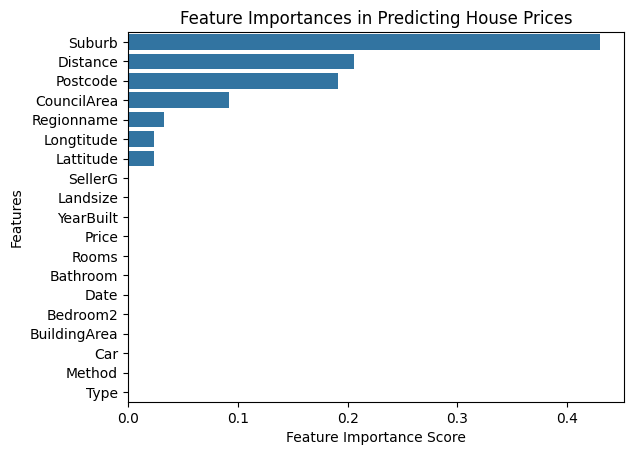

In [5]:


sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importances in Predicting House Prices")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()


In [6]:

top_5_features = feature_names[indices[:5]]
X_train_reduced = X_train[top_5_features]
X_test_reduced = X_test[top_5_features]

rf_reduced = RandomForestRegressor(n_estimators=10, random_state=42)
rf_reduced.fit(X_train_reduced, y_train)

y_pred = rf.predict(X_test)
mae_original = mean_absolute_error(y_test, y_pred)

y_pred_reduced = rf_reduced.predict(X_test_reduced)
mae_reduced = mean_absolute_error(y_test, y_pred_reduced)

print(f"Mean Absolute Error with all features: {mae_original}")
print(f"Mean Absolute Error with top 5 features: {mae_reduced}")

Mean Absolute Error with all features: 16.97251601797839
Mean Absolute Error with top 5 features: 5.943788849574448
